import nesseary libraries 

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt
%matplotlib inline

read csv file

In [151]:
df=pd.read_csv("file.csv")

In [152]:
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [153]:
df.describe()

,Unnamed: 0,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52955.000000,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,26477.000000,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,15286.936089,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,0.000000,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13238.500000,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,26477.000000,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,39715.500000,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,52954.000000,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [155]:
df.nunique()

Unnamed: 0             52955
CustomerID              1468
Gender                     2
Location                   5
Tenure_Months             49
Transaction_ID         25061
Transaction_Date         365
Product_SKU             1145
Product_Description      404
Product_Category          21
Quantity                 151
Avg_Price                546
Delivery_Charges         267
Coupon_Status              3
GST                        4
Date                     365
Offline_Spend             11
Online_Spend             365
Month                     12
Coupon_Code               48
Discount_pct               3
dtype: int64

### Data cleaning 

In [156]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [157]:
df.duplicated().sum()

0

### Feature extraction

In [158]:
df['totalspend']=df['Offline_Spend']+df['Online_Spend']
df['totalprice']=df['Quantity']*df['Avg_Price']+df['Delivery_Charges']

/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_14585/40252500.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c1=cm.get_cmap('Accent')


<Axes: xlabel='Location', ylabel='Count'>

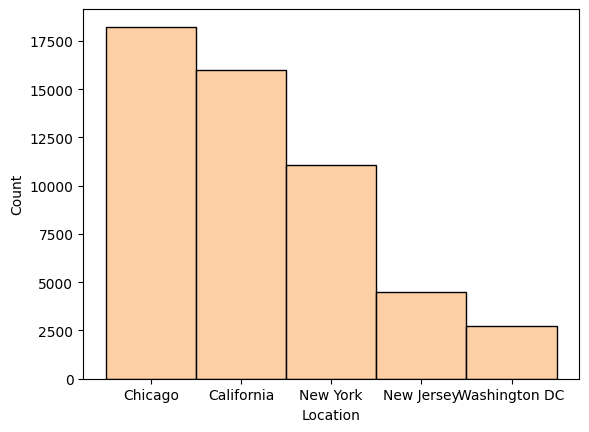

In [159]:
from matplotlib import cm
c1=cm.get_cmap('Accent')
sns.histplot(df['Location'],color=c1(0.3))

#### most of cutomers are from chicago 

/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_14585/795563202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(topcustomer.head(20),palette='husl')


<Axes: xlabel='CustomerID', ylabel='totalspend'>

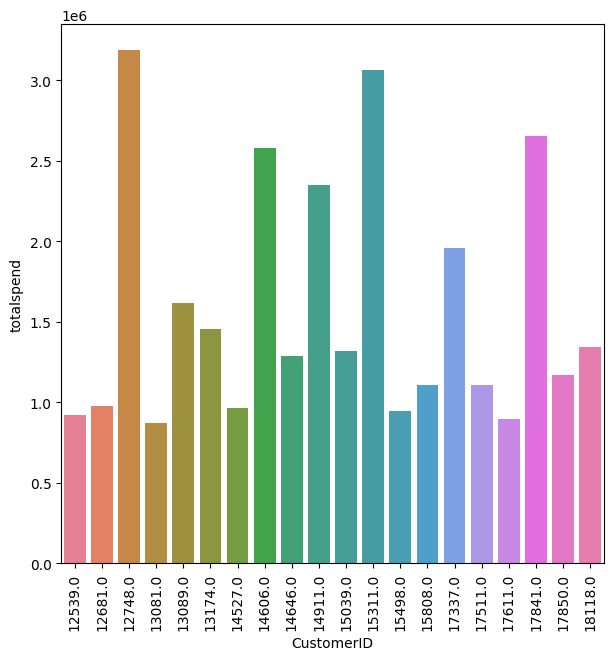

In [160]:
topcustomer=df['totalspend'].groupby([df['CustomerID']]).sum().sort_values(ascending=False)
topcustomer
fig,axis=plt.subplots(figsize=(7,7))
plt.xticks(rotation=90)
sns.barplot(topcustomer.head(20),palette='husl')


#### the most custmor spend is with id 12748

([<matplotlib.patches.Wedge at 0x29590e790>,
 [Text(-0.4172714865992268, 1.0177841158473988, 'Female'),
  Text(0.4172714865992264, -1.017784115847399, 'Male')],
 [Text(-0.22760262905412368, 0.5551549722803993, '62.4%'),
  Text(0.22760262905412348, -0.5551549722803995, '37.6%')])

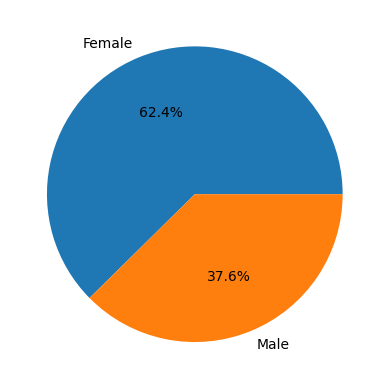

In [161]:
v=df.Gender.value_counts()
plt.pie(v,labels=['Female','Male'],autopct="%1.1f%%")

#### females by more than males 

Text(0.5, 1.0, 'Price Spend')

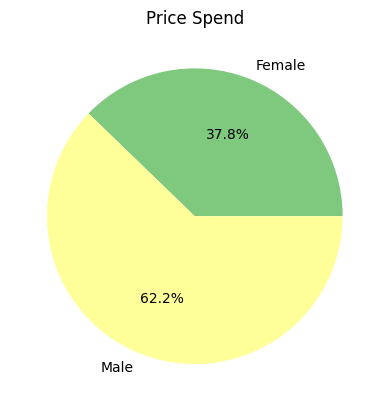

In [162]:
male=df[['totalprice','Gender']].groupby('Gender').get_group('M')['totalprice'].sum()
female=df[['totalprice','Gender']].groupby('Gender').get_group('F')['totalprice'].sum()
sizes=[round(male),round(female)]
plt.pie(sizes,autopct='%1.1f%%',labels=['Female','Male'],colors=[c1(0.1),c1(0.4)])
plt.title('Price Spend')

#### females spend more money than males 

/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_14585/3553962703.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c1=cm.get_cmap('Pastel1')


<Axes: xlabel='Tenure_Months', ylabel='Count'>

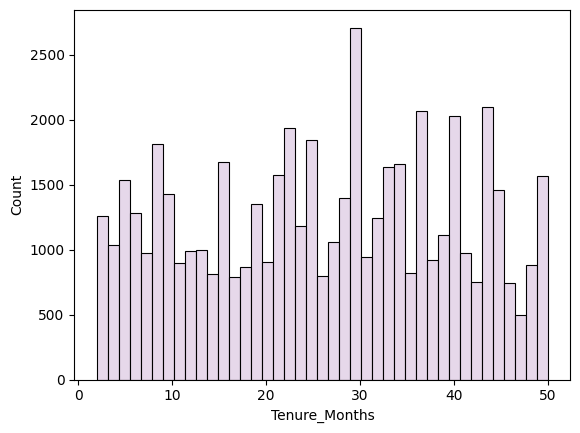

In [163]:
c1=cm.get_cmap('Pastel1')
sns.histplot(df['Tenure_Months'],color=c1(0.4))

#### max number of months the customer has been associated with the platform is 30

/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_14585/1113339432.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df['Product_Category'], palette='husl')


<Axes: ylabel='Product_Category'>

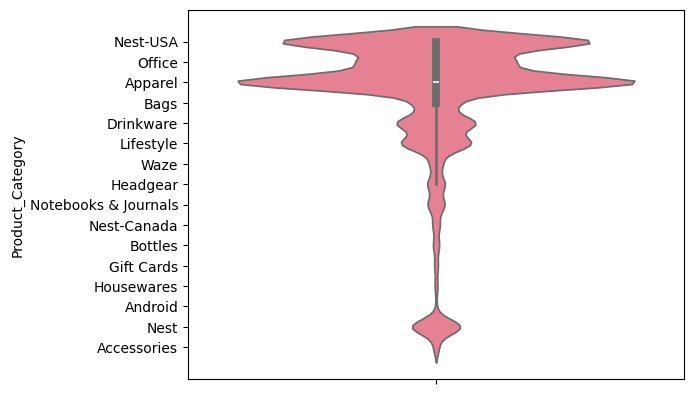

In [164]:
sns.violinplot(df['Product_Category'], palette='husl')

#### most frequent product category is apparel

<Axes: >

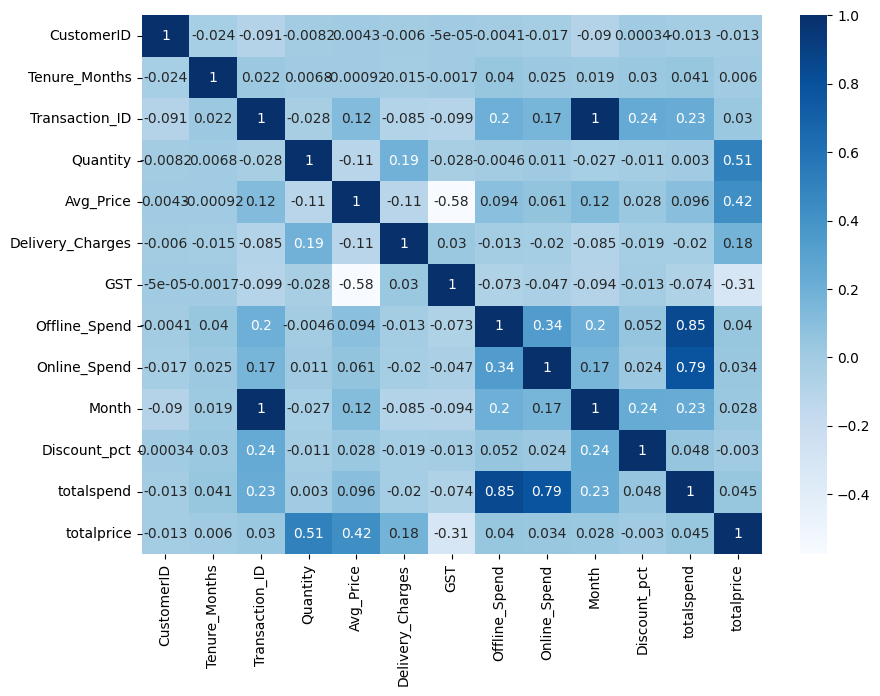

In [165]:
fig,axis=plt.subplots(figsize=(10,7))
num=df.select_dtypes(include=['number'])
sns.heatmap(num.corr(), annot=True,cmap='Blues')

#### Total Price and GST are negatively correlated
#### Other all features have less correlation with each other

/var/folders/01/_nbl43b94c714j63ptzqdmjc0000gn/T/ipykernel_14585/1755480860.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Coupon_Status'], palette='husl')


<Axes: xlabel='Coupon_Status', ylabel='count'>

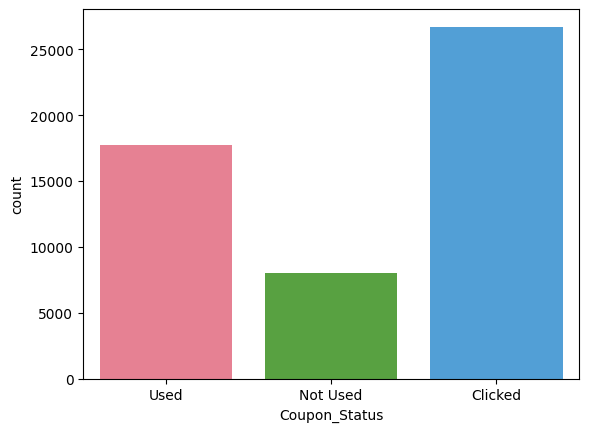

In [166]:
sns.countplot(x=df['Coupon_Status'], palette='husl')

### RFM model

set max date to calculate recency (max date in data set is 31-12-2019)

In [175]:
reference_date = pd.to_datetime('2020-01-01')
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

calculating recency, frequency and montery 

In [177]:
rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda date: (reference_date - date.max()).days,
    'Transaction_ID': lambda num: len(num),
    'totalprice': lambda price: price.sum()
})

rename columns 

In [178]:
rfm.columns =['recency','frequency', 'monetary']
rfm['recency'] = rfm['recency'].astype(int)

divide custumers into 4 groups 

In [179]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1']) 
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1']) 

In [180]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,108,2,180.99,2,4,4
12347.0,60,59,14471.16,2,1,1
12348.0,74,23,1639.27,2,2,3
12350.0,18,17,1487.95,1,3,3
12356.0,108,36,2079.96,2,2,2


In [181]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)      

print the highst score customers 

In [192]:
rfm[rfm['RFM_Score']=='111'].sort_values('monetary',ascending=False)
# rfm.head().sort_values(by='RFM_Score',ascending=True)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
15311.0,13,583,79822.73,1,1,1,111
14606.0,1,570,63805.14,1,1,1,111
14911.0,11,517,55840.70,1,1,1,111
17841.0,18,567,53755.74,1,1,1,111
17337.0,17,260,38162.49,1,1,1,111
...,...,...,...,...,...,...,...
17404.0,45,48,4722.04,1,1,1,111
12540.0,22,64,4595.59,1,1,1,111
13078.0,52,54,4520.62,1,1,1,111
